In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Increase the default plot size
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [4]:
df = pd.read_table('../iris.data', sep=",", skiprows=0)
df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            4.9           3.0            1.4           0.2  Iris-setosa
1            4.7           3.2            1.3           0.2  Iris-setosa
2            4.6           3.1            1.5           0.2  Iris-setosa
3            5.0           3.6            1.4           0.2  Iris-setosa
4            5.4           3.9            1.7           0.4  Iris-setosa


In [5]:
target = np.array(df['Species'])
X = np.array(df.drop(['Species'], axis=1))


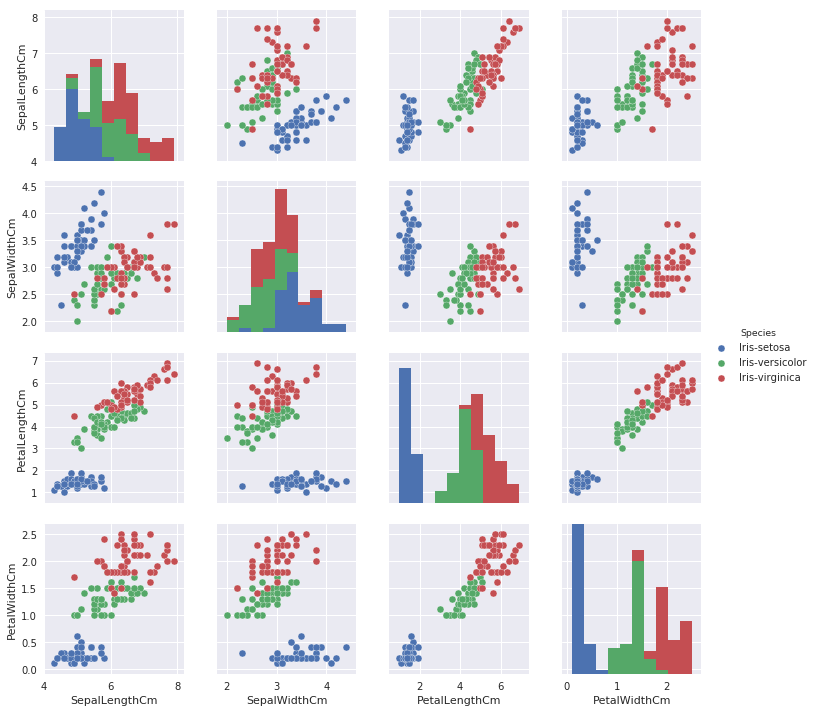

In [21]:
# Plot correlations between features
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
sns.pairplot(df, hue='Species');

In [7]:
# Initialize centroids for 3 labels
def init_centroid(k=3):
    np.random.seed(0)
    c = np.random.random((k,4))
    return c

In [8]:
init_c = init_centroid()*5
print(init_c)

[[2.74406752 3.57594683 3.01381688 2.72441591]
 [2.118274   3.22947057 2.18793606 4.458865  ]
 [4.8183138  1.91720759 3.95862519 2.6444746 ]]


In [9]:
# Define the distance function
def distance(t,c):
    return math.sqrt(np.sum((t-c)*(t-c)))

In [10]:
# Create a loop to find the centroids of the dataset
def kmeans(X_train,nIter):
    m = X_train.shape[0]
    cen = init_centroid(3)*5
    k = cen.shape[0]
    dis = np.zeros([m,k])
    cen_ass = np.zeros([m,])
    cen_his = cen
    temp = np.zeros([1,4])
    count = 0
    for t in range(nIter):
        for r in range(0,m):
            for c in range(0,k):
                dis[r][c] = distance(X_train[r],cen[c])
        cen_ass = (np.argmin(dis,axis=1)).reshape((-1,))
        cen_his = np.concatenate((cen_his,cen))
        print(cen)
        for c in range(0,k):
            temp = np.zeros([1,4])
            count = 0
            for r in range(0,m):
                temp = temp + (0.98)*(cen_ass[r]==c)*X_train[r]+(0.02)*(cen_ass[r]!=c)*X[r]
                count = count + (0.98)*(cen_ass[r]==c)+(0.02)*(cen_ass[r]!=c)
            cen[c] = (temp.reshape((-1,)))/(count)
    return cen,cen_ass,cen_his

In [11]:
cen,cen_ass,cen_his = kmeans(X, nIter=10)

[[2.74406752 3.57594683 3.01381688 2.72441591]
 [2.118274   3.22947057 2.18793606 4.458865  ]
 [4.8183138  1.91720759 3.95862519 2.6444746 ]]
[[5.00089837 3.43009545 1.64985963 0.33262212]
 [5.84832215 3.05100671 3.77449664 1.20536913]
 [6.11455283 2.93191039 4.44198271 1.47955548]]
[[5.05437825 3.39456218 1.60287885 0.30211915]
 [5.57892116 2.64381743 3.82473029 1.17278008]
 [6.44176727 2.95633188 5.15407141 1.79573594]]
[[5.05437825 3.39456218 1.60287885 0.30211915]
 [5.60516048 2.67249843 3.96677155 1.23071114]
 [6.52430892 2.97754346 5.23522371 1.83767455]]
[[5.05437825 3.39456218 1.60287885 0.30211915]
 [5.6665918  2.67546322 4.02425604 1.24626614]
 [6.54452819 2.99360868 5.27778113 1.86445583]]
[[5.05437825 3.39456218 1.60287885 0.30211915]
 [5.69651948 2.70722078 4.06732468 1.26275325]
 [6.56621494 2.98878033 5.30854081 1.88250867]]
[[5.05437825 3.39456218 1.60287885 0.30211915]
 [5.71849975 2.71434364 4.07541814 1.26609225]
 [6.565696   2.988608   5.322496   1.88992   ]]
[[5.05

In [12]:
print(cen_ass)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1
 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [14]:
pca = PCA(n_components=2,random_state=1)
pca.fit(X)
X_new = pca.transform(X)
cen_new = pca.transform(cen)
init_c_new = pca.transform(init_c)

In [15]:
# Assign a color to each label
color = ['r','g','b']
for c,t in enumerate(np.unique(target)):
    print(c,t)
    target[target == t] = color[c]

0 Iris-setosa
1 Iris-versicolor
2 Iris-virginica


In [16]:
cen_col = ['w' for i in range(150)]
for c,i in enumerate(cen_ass):
    if i == 0:
        cen_col[c] = 'r'
    elif i == 1:
        cen_col[c] = 'g'
    elif i == 2:
        cen_col[c] = 'b'

In [17]:
out_index = []
for target_item, c_item in zip(target, cen_col):
    if target_item == c_item:
        out_index.append(True)
    else:
        out_index.append(False)


In [18]:
outliers = np.array([x for c,x in enumerate(X_new) if out_index[c] == False])
outliers.shape

(14, 2)

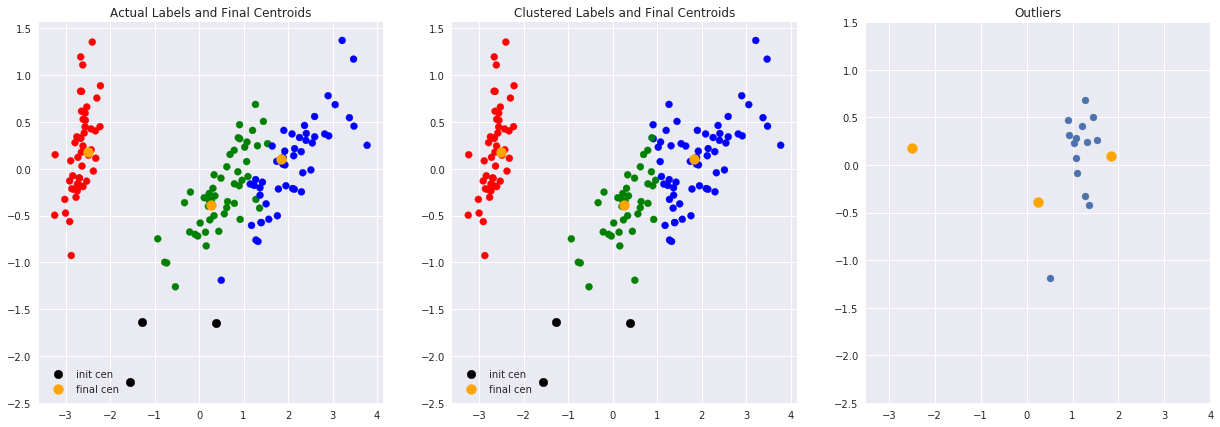

In [19]:
# Plot actual labels, initial centroid and final centroids
plt.figure(figsize=(21,7))
plt.subplot(131)
plt.scatter(X_new[:,0], X_new[:,1], color=target)
yellow = plt.scatter(init_c_new[:,0], init_c_new[:,1], color='black', s=75, label='init cen')
black = plt.scatter(cen_new[:,0], cen_new[:,1], color='orange', s=100, label='final cen')
plt.legend(handles=[yellow,black])
plt.title('Actual Labels and Final Centroids')

# Plot clustered labels, initial centroid and final centroids
plt.subplot(132)
plt.scatter(X_new[:,0],X_new[:,1], color=cen_col)
plt.scatter(init_c_new[:,0], init_c_new[:,1], color='black', s=75, label='init cen')
plt.scatter(cen_new[:,0],cen_new[:,1], color='orange', s=100, label='final cen')
plt.legend(handles=[yellow,black])
plt.title('Clustered Labels and Final Centroids')

# Plot outliers
plt.subplot(133)
axes = plt.gca()
axes.set_xlim([-3.5,4])
axes.set_ylim([-2.5,1.5])
plt.scatter(outliers[:,0], outliers[:,1])
plt.scatter(cen_new[:,0], cen_new[:,1], color='orange', s=100, label='final cen')
plt.title('Outliers')

plt.show()

In [380]:
cen_his_col = []
for  i in range(11):
    cen_his_col.append('r')
    cen_his_col.append('g')
    cen_his_col.append('b')

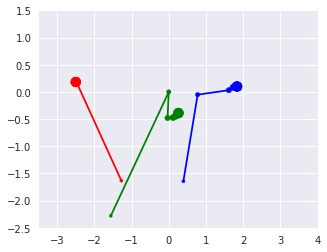

In [381]:
# Plot the tranformation of the centroid locations
axes = plt.gca()
axes.set_xlim([-3.5,4])
axes.set_ylim([-2.5,1.5])

cen_his_new = pca.transform(cen_his)
plt.scatter(cen_his_new[::3,0],cen_his_new[::3,1],s=[i*10 for i in range(11)],color=cen_his_col[::3])
plt.plot(cen_his_new[::3,0],cen_his_new[::3,1],'r')

plt.scatter(cen_his_new[1::3,0],cen_his_new[1::3,1],s=[i*10 for i in range(11)],color=cen_his_col[1::3])
plt.plot(cen_his_new[1::3,0],cen_his_new[1::3,1],'g')

plt.scatter(cen_his_new[2::3,0],cen_his_new[2::3,1],s=[i*10 for i in range(11)],color=cen_his_col[2::3])
plt.plot(cen_his_new[2::3,0],cen_his_new[2::3,1],'b')

plt.scatter(cen_new[:,0],cen_new[:,1],color=['r','g','b'],s=100,label='final cen')
plt.show()

In [422]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1000)
# Train the classifier
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
print(model.score(x_test,y_test.ravel()))

1.0
